<a href="https://colab.research.google.com/github/adsc3/covid19-tokyo-extrapolation/blob/master/covid19_tokyo_extrapolate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ取得元等
https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
from os import path

from scipy.optimize import curve_fit
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 東京都のcovid19罹患者データ
tokyo_patients_url = "https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv"
csv_filename = tokyo_patients_url.split('/')[-1]

In [0]:
save_path = path.join("./Data/", csv_filename)
urllib.request.urlretrieve(tokyo_patients_url, save_path)
df = pd.read_csv(save_path)

# データの整形

In [0]:
df['公表_年月日'] = pd.to_datetime(df['公表_年月日'])
gp_date = df.groupby("公表_年月日")
patient_num = gp_date.count()["No"]

# 0人の日のデータを追加
dt = patient_num.index[0]
last = patient_num.index[-1]
while dt <= last:
  if not dt in patient_num.index:
    patient_num[dt] = 0
  dt = dt + pd.Timedelta('1 days')

patient_num = patient_num.sort_index()

# 単純に指数関数でフィットしてみる

[0.54294058]


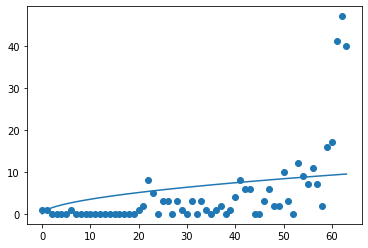

[0.57607605]


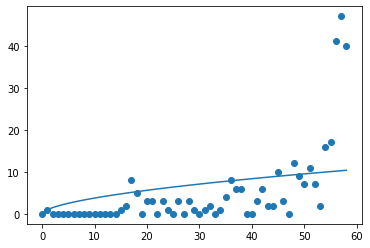

[0.61300286]


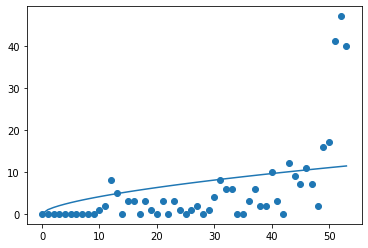

[0.65433853]


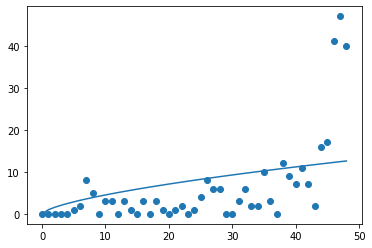

[0.70130164]


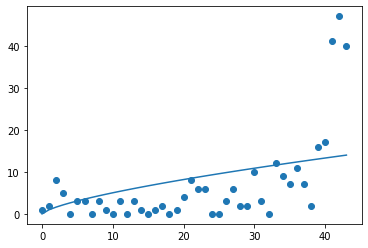

[0.7581227]


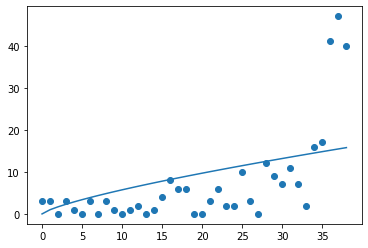

[0.82758807]


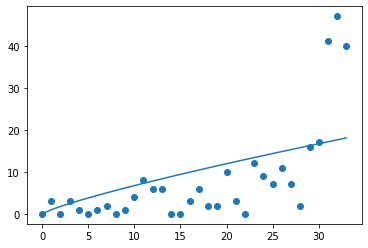

[0.91375608]


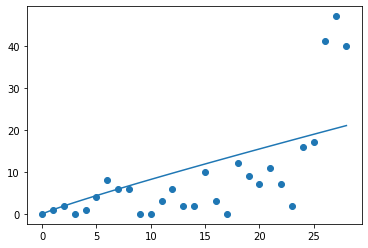

[1.02527467]


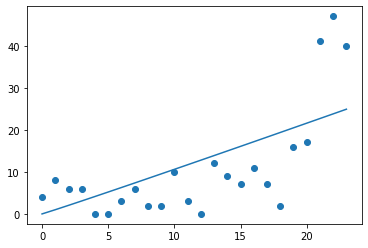

[1.1828983]


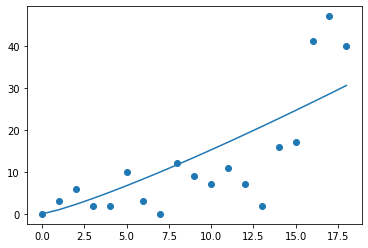

[1.42561057]


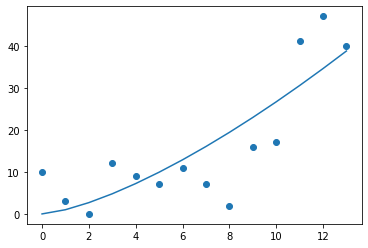

[1.88488513]


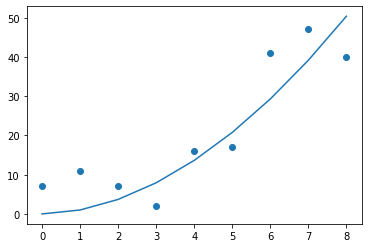

In [4]:
def func(x ,a):
  return x**a

for startDay in range(0, 60, 5):
  x = range(0,len(patient_num)-startDay)
  params, cov = curve_fit(func, x, patient_num[startDay:])

  print(params)
  plt.scatter(x, patient_num[startDay:])
  plt.plot(x, func(x, *params))
  plt.show()